In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!head -n 10 /home/kyohei/pydata-book/ch02/names/yob1880.txt

In [6]:
years = range(1880,2011)
pieces = []
columns = ['name','sex','births']
for year in years:
    path = '/home/kyohei/pydata-book/ch02/names/yob%d.txt' %year
    rec = pd.read_csv(path,header=None,names=columns)
    rec['year'] = year
    pieces.append(rec)
    
names = pd.concat(pieces,ignore_index=True)

In [7]:
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [8]:
total_births = names.pivot_table('births',index='year',columns='sex',aggfunc=sum)

In [10]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


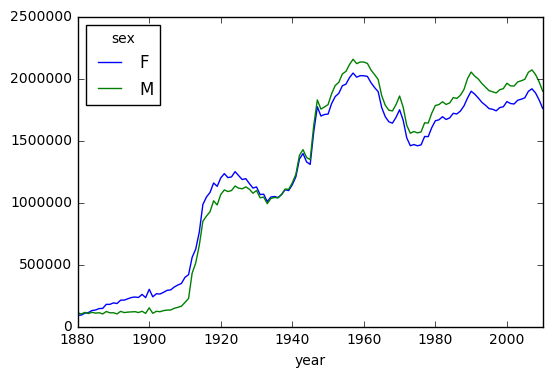

In [11]:
total_births.plot()

In [12]:
def add_prop(group):
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group

names = names.groupby(['year','sex']).apply(add_prop)

In [13]:
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [15]:
np.allclose(names.groupby(['year','sex']).prop.sum(),1)

True

In [16]:
def get_top1000(group):
    return group.sort_index(by='births',ascending=False)[:1000]
top1000 = names.groupby(['year','sex']).apply(get_top1000)

/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


In [17]:
top1000.head()

name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077643
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

In [19]:
top1000.shape

(261877, 5)

In [20]:
boys = top1000[top1000.sex=='M']
girls = top1000[top1000.sex=='F']

In [21]:
total_births = top1000.pivot_table('births',index='year',columns='name',aggfunc=sum)

In [22]:
total_births.head()

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efbffe72150>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7efbfe1b0950>], dtype=object)

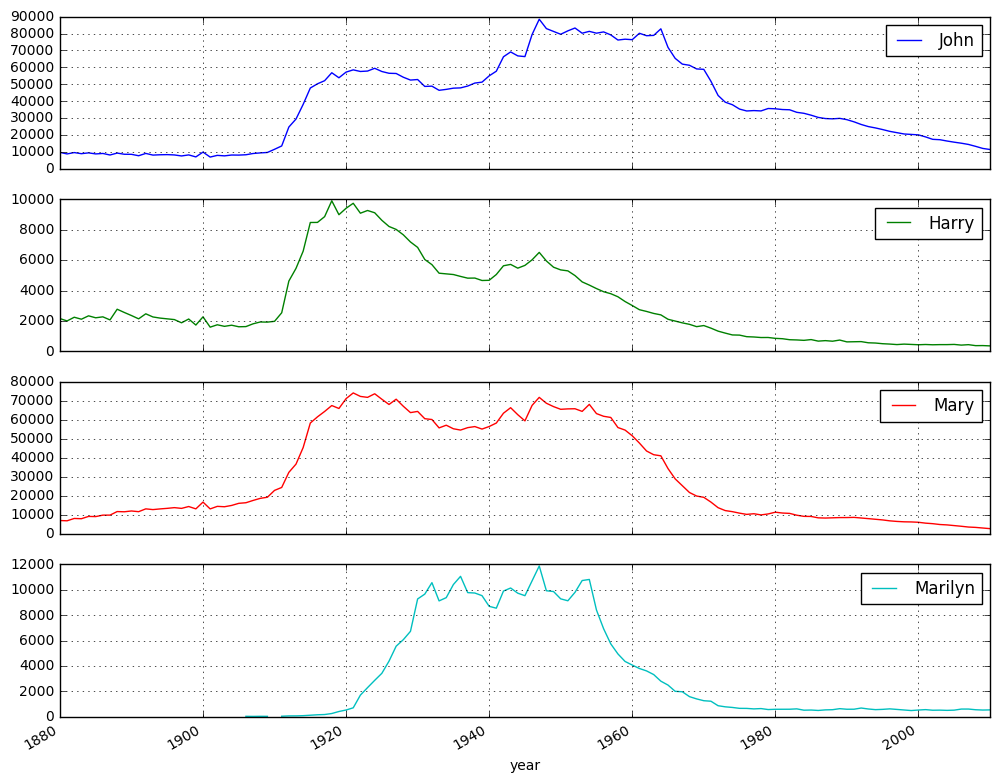

In [25]:
subset = total_births[['John','Harry','Mary','Marilyn']]
subset.plot(subplots=True,figsize=(12,10),grid=True)

In [26]:
table = top1000.pivot_table('prop',index='year',columns='sex',aggfunc=sum)

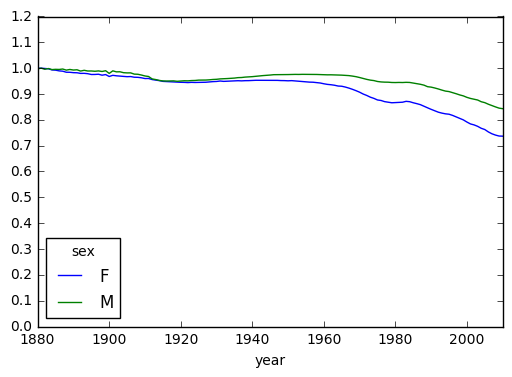

In [28]:
table.plot(yticks=np.linspace(0,1.2,13))

In [29]:
def get_quantile_count(group,q=0.5):
    group = group.sort_index(by='prop',ascending=False).prop.cumsum()
    return (group.searchsorted(q) + 1)[0]

In [30]:
diversity = top1000.groupby(['year','sex']).apply(get_quantile_count)

/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


In [33]:
diversity = diversity.unstack('sex')

In [34]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


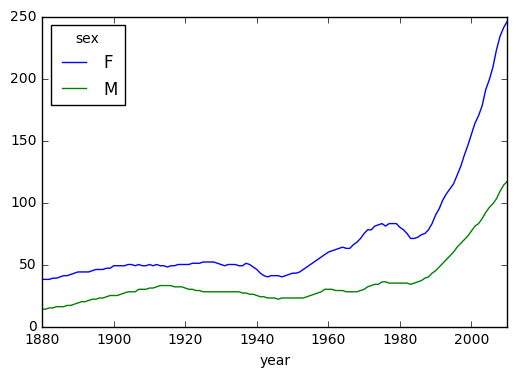

In [35]:
diversity.plot()

In [36]:
get_last_letters = lambda x: x[-1]
last_letters = names.name.map(get_last_letters)

In [38]:
table = names.pivot_table('births',index=last_letters,columns=['sex','year'],aggfunc=sum)

In [40]:
table.head()

sex         F                                                                 \
year     1880     1881     1882     1883     1884     1885     1886     1887   
name                                                                           
a     31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0  48942.0   
b         NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c         NaN      NaN      5.0      5.0      NaN      NaN      NaN      NaN   
d       609.0    607.0    734.0    810.0    916.0    862.0   1007.0   1027.0   
e     33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0  54353.0   

sex                       ...            M                                \
year     1888     1889    ...         2001      2002      2003      2004   
name                      ...                                              
a     59442.0  58631.0    ...      39124.0   38815.0   37825.0   38650.0   
b         NaN      NaN    ...      50950.0   49284.0   48065.0   45914.0   
c         NaN      NaN    ...      27113.0   27238.0   27697.0   26778.0   
d      1298.0   1374.0    ...      60838.0   55829.0   53391.0   51754.0   
e     66750.0  66663.0    ...     145395.0  144651.0  144769.0  142098.0   

sex                                                               
year      2005      2006      2007      2008      2009      2010  
name                                                              
a      36838.0   36156.0   34654.0   32901.0   31430.0   28438.0  
b      43144.0   42600.0   42123.0   39945.0   38862.0   38859.0  
c      26078.0   26635.0   26864.0   25318.0   24048.0   23125.0  
d      50670.0   51410.0   50595.0   47910.0   46172.0   44398.0  
e     141123.0  142999.0  143698.0  140966.0  135496.0  129012.0  

[5 rows x 262 columns]

In [41]:
subtable = table.reindex(columns=[1910,1960,2010],level='year')

In [42]:
subtable.head()

sex          F                            M                    
year      1910      1960      2010     1910      1960      2010
name                                                           
a     108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b          NaN     694.0     450.0    411.0    3912.0   38859.0
c          5.0      49.0     946.0    482.0   15476.0   23125.0
d       6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e     133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [43]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [44]:
letter_prob = subtable / subtable.sum()

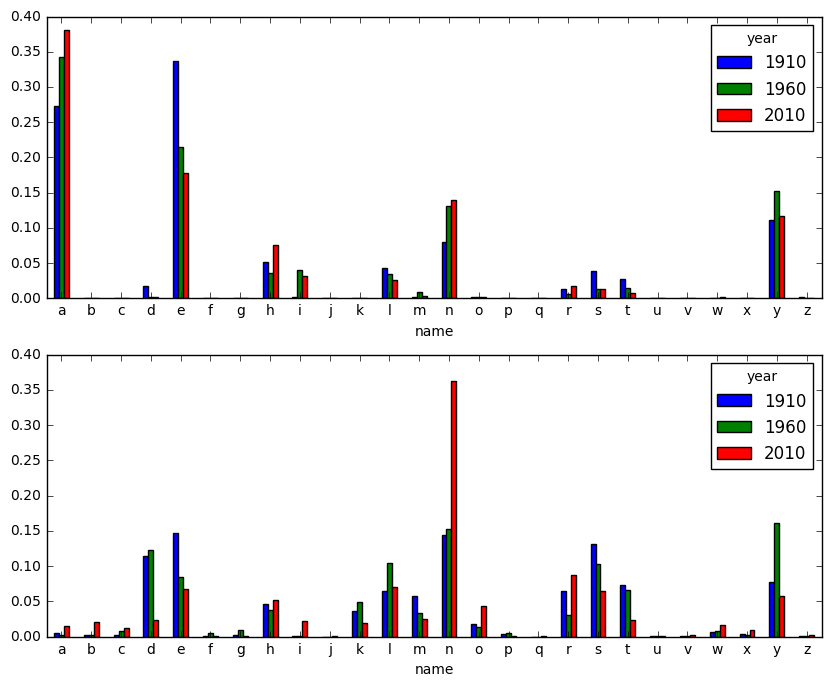

In [47]:
fig,axes = plt.subplots(2,1,figsize=(10,8))
letter_prob ['F'].plot(kind='bar',ax=axes[0],rot=0)
letter_prob ['M'].plot(kind='bar',ax=axes[1],rot=0)

In [48]:
table.head()

sex         F                                                                 \
year     1880     1881     1882     1883     1884     1885     1886     1887   
name                                                                           
a     31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0  48942.0   
b         NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c         NaN      NaN      5.0      5.0      NaN      NaN      NaN      NaN   
d       609.0    607.0    734.0    810.0    916.0    862.0   1007.0   1027.0   
e     33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0  54353.0   

sex                       ...            M                                \
year     1888     1889    ...         2001      2002      2003      2004   
name                      ...                                              
a     59442.0  58631.0    ...      39124.0   38815.0   37825.0   38650.0   
b         NaN      NaN    ...      50950.0   49284.0   48065.0   45914.0   
c         NaN      NaN    ...      27113.0   27238.0   27697.0   26778.0   
d      1298.0   1374.0    ...      60838.0   55829.0   53391.0   51754.0   
e     66750.0  66663.0    ...     145395.0  144651.0  144769.0  142098.0   

sex                                                               
year      2005      2006      2007      2008      2009      2010  
name                                                              
a      36838.0   36156.0   34654.0   32901.0   31430.0   28438.0  
b      43144.0   42600.0   42123.0   39945.0   38862.0   38859.0  
c      26078.0   26635.0   26864.0   25318.0   24048.0   23125.0  
d      50670.0   51410.0   50595.0   47910.0   46172.0   44398.0  
e     141123.0  142999.0  143698.0  140966.0  135496.0  129012.0  

[5 rows x 262 columns]

In [49]:
letter_prop = table / table.sum()

In [53]:
dny_ts = letter_prop.ix[['d','n','y'],'M'].T

In [55]:
dny_ts.head()

name,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


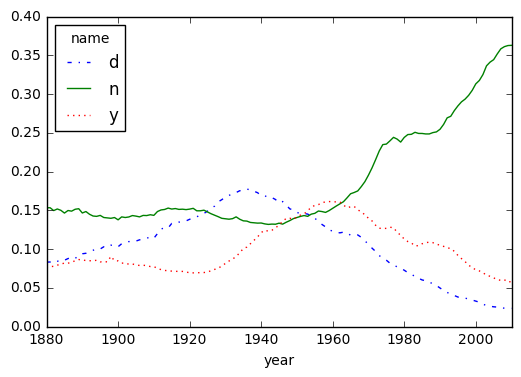

In [56]:
dny_ts.plot(style={'d':'-.','n':'-','y':':'})

In [59]:
all_names = top1000.name.unique()

In [63]:
mask = np.array(['lesl' in x.lower() for x in all_names])

In [67]:
lesley_like = all_names[mask]

In [68]:
top1000.head()

name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077643
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

In [71]:
filtered = top1000[top1000.name.isin(lesley_like)]

In [74]:
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [75]:
table = filtered.pivot_table('births',index='year',columns='sex',aggfunc=sum)

In [76]:
table.head()

sex,F,M
year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0


In [77]:
table = table.div(table.sum(1),axis=0)

In [78]:
table.head()

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857


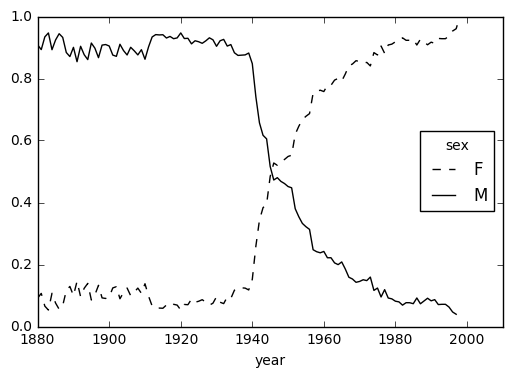

In [79]:
table.plot(style={'F':'k--','M':'k-'})